In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
incomes = pd.read_csv("../../data/curated/income_by_sa2.csv")
population = pd.read_csv("../../data/curated/population_by_sa2.csv")
properties = pd.read_csv("../../data/curated/AllProperties.csv")

In [4]:
properties['Suburb'] = properties['Suburb'].str.split('-')
properties = properties.explode('Suburb')
properties.rename(columns={'Suburb':'Label'}, inplace=True)
properties


,Label,2000 Mar Count,2000 Mar Median,2000 Jun Count,2000 Jun Median,2000 Sep Count,2000 Sep Median,2000 Dec Count,2000 Dec Median,2001 Mar Count,...,2022 Mar Count,2022 Mar Median,2022 Jun Count,2022 Jun Median,2022 Sep Count,2022 Sep Median,2022 Dec Count,2022 Dec Median,2023 Mar Count,2023 Mar Median
0,Albert Park,1143,260,1134,260,1177,270,1178,275,1208,...,867,500,855,515,881,500,832,525,786,545
0,Middle Park,1143,260,1134,260,1177,270,1178,275,1208,...,867,500,855,515,881,500,832,525,786,545
0,West St Kilda,1143,260,1134,260,1177,270,1178,275,1208,...,867,500,855,515,881,500,832,525,786,545
1,Armadale,733,200,737,200,738,205,739,210,718,...,805,430,851,450,852,450,840,460,751,490
2,Carlton North,864,260,814,260,799,265,736,270,718,...,581,580,535,595,547,600,546,600,490,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,851,125,823,120,831,125,807,125,796,...,895,360,871,380,898,380,904,380,903,385
142,Wanagaratta,705,125,671,125,631,130,623,130,602,...,531,370,530,380,547,380,541,380,518,380
143,Warragul,385,130,367,135,382,135,366,135,365,...,522,400,512,400,515,420,523,430,497,440
144,Warrnambool,1266,130,1229,135,1204,135,1135,135,1069,...,854,400,844,400,870,420,859,420,867,420


In [5]:
# Drop unnecessary columns in the properties dataframe
property_columns = list(properties.columns)

cols_to_keep = []
cols_to_keep.append(property_columns[0])
cols_to_keep = cols_to_keep + property_columns[-58:]

properties = properties[cols_to_keep]
properties


,Label,2016 Mar Count,2016 Mar Median,2016 Jun Count,2016 Jun Median,2016 Sep Count,2016 Sep Median,2016 Dec Count,2016 Dec Median,2017 Mar Count,...,2022 Mar Count,2022 Mar Median,2022 Jun Count,2022 Jun Median,2022 Sep Count,2022 Sep Median,2022 Dec Count,2022 Dec Median,2023 Mar Count,2023 Mar Median
0,Albert Park,961,520,970,500,971,520,921,520,910,...,867,500,855,515,881,500,832,525,786,545
0,Middle Park,961,520,970,500,971,520,921,520,910,...,867,500,855,515,881,500,832,525,786,545
0,West St Kilda,961,520,970,500,971,520,921,520,910,...,867,500,855,515,881,500,832,525,786,545
1,Armadale,653,400,659,400,673,400,660,410,681,...,805,430,851,450,852,450,840,460,751,490
2,Carlton North,544,530,544,530,529,520,509,530,501,...,581,580,535,595,547,600,546,600,490,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,1119,270,1127,270,1122,270,1118,270,1129,...,895,360,871,380,898,380,904,380,903,385
142,Wanagaratta,761,260,740,260,734,260,719,260,717,...,531,370,530,380,547,380,541,380,518,380
143,Warragul,502,290,505,290,490,295,479,300,488,...,522,400,512,400,515,420,523,430,497,440
144,Warrnambool,1409,290,1422,290,1401,285,1406,290,1390,...,854,400,844,400,870,420,859,420,867,420


In [6]:
i = 1
while i < len(cols_to_keep)-8:
    avg_count = (properties[cols_to_keep[i]] + properties[cols_to_keep[i+2]] + properties[cols_to_keep[i+4]] + properties[cols_to_keep[i+6]]) / 4
    avg_median = (properties[cols_to_keep[i+1]] + properties[cols_to_keep[i+3]] + properties[cols_to_keep[i+5]] + properties[cols_to_keep[i+7]]) / 4

    properties[f'{cols_to_keep[i][0:4]}_avg_count'] = avg_count
    properties[f'{cols_to_keep[i][0:4]}_avg_median'] = avg_median

    '''print(f'Year {cols_to_keep[i]}')
    print(avg_count)
    print(avg_median)'''
    i += 8

properties.rename(columns={'2023 Mar Count': '2023_avg_count'}, inplace=True)
properties.rename(columns={'2023 Mar Median': '2023_avg_median'}, inplace=True)

/tmp/ipykernel_8948/3781582355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties[f'{cols_to_keep[i][0:4]}_avg_count'] = avg_count
/tmp/ipykernel_8948/3781582355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties[f'{cols_to_keep[i][0:4]}_avg_median'] = avg_median
/tmp/ipykernel_8948/3781582355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [7]:
properties_yearly = properties[['Label', '2016_avg_count', '2016_avg_median', '2017_avg_count', '2017_avg_median', '2018_avg_count', '2018_avg_median', '2019_avg_count', '2019_avg_median', '2020_avg_count', '2020_avg_median', '2021_avg_count', '2021_avg_median', '2022_avg_count', '2022_avg_median','2023_avg_count', '2023_avg_median']]

In [8]:
# Keep only even numbered columns in the properties dataframe
even_cols = [col for idx, col in enumerate(properties_yearly.columns) if idx % 2 == 0]
properties_even = properties_yearly[even_cols]
properties_even

,Label,2016_avg_median,2017_avg_median,2018_avg_median,2019_avg_median,2020_avg_median,2021_avg_median,2022_avg_median,2023_avg_median
0,Albert Park,515.00,527.75,562.50,568.00,570.00,498.75,510.00,545
0,Middle Park,515.00,527.75,562.50,568.00,570.00,498.75,510.00,545
0,West St Kilda,515.00,527.75,562.50,568.00,570.00,498.75,510.00,545
1,Armadale,402.50,445.00,487.50,481.25,498.75,433.75,447.50,490
2,Carlton North,527.50,545.00,566.25,579.25,588.75,577.50,593.75,620
...,...,...,...,...,...,...,...,...,...
141,Traralgon,270.00,276.25,278.75,287.50,307.50,345.00,375.00,385
142,Wanagaratta,260.00,266.25,274.25,287.50,299.50,340.00,377.50,380
143,Warragul,293.75,305.00,323.75,347.00,360.00,383.75,412.50,440
144,Warrnambool,288.75,290.00,300.00,322.50,342.50,365.00,410.00,420


In [9]:
# Merge the data
data = pd.merge(incomes, population, on='Label')
data = pd.merge(data, properties_even, on='Label')


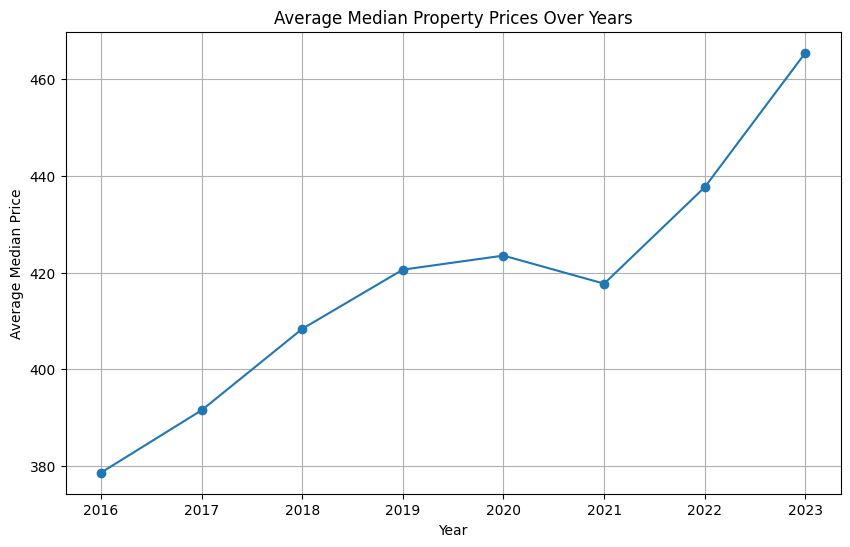

In [10]:
mean_2016 = data['2016_avg_median'].mean()
mean_2017 = data['2017_avg_median'].mean()
mean_2018 = data['2018_avg_median'].mean()
mean_2019 = data['2019_avg_median'].mean()
mean_2020 = data['2020_avg_median'].mean()
mean_2021 = data['2021_avg_median'].mean()
mean_2022 = data['2022_avg_median'].mean()
mean_2023 = data['2023_avg_median'].mean()

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
means = [mean_2016, mean_2017, mean_2018, mean_2019, mean_2020, mean_2021, mean_2022, mean_2023]

plt.figure(figsize=(10, 6))
plt.plot(years, means, marker='o')
plt.title('Average Median Property Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Average Median Price')
plt.grid(True)
plt.savefig('../../plots/average_median_prices_no_imputation.png')
plt.show()

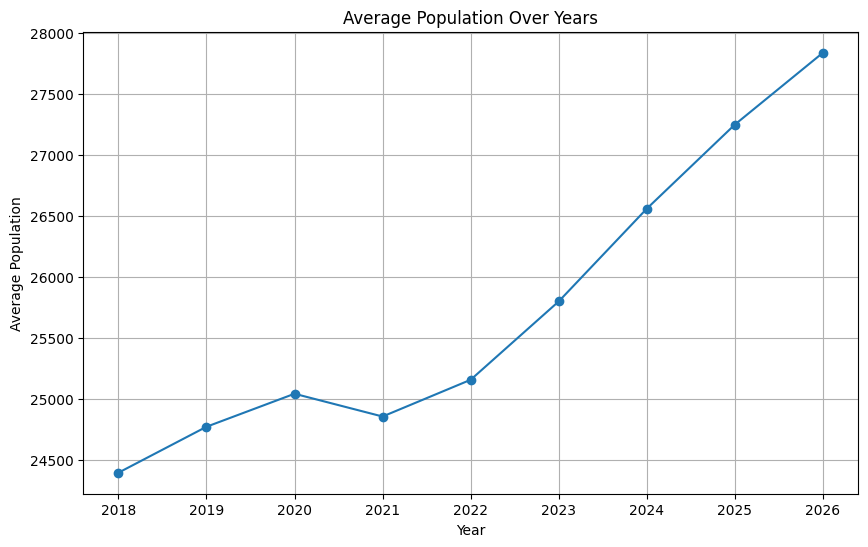

In [11]:
pop_2018 = data['estimated_population_2018'].mean()
pop_2019 = data['estimated_population_2019'].mean()
pop_2020 = data['estimated_population_2020'].mean()
pop_2021 = data['estimated_population_2021'].mean()
pop_2022 = data['estimated_population_2022'].mean()
pop_2023 = data['estimated_population_2023'].mean()
pop_2024 = data['estimated_population_2024'].mean()
pop_2025 = data['estimated_population_2025'].mean()
pop_2026 = data['estimated_population_2026'].mean()

years = ['2018', '2019', '2020', '2021', '2022', '2023','2024','2025','2026']
populations = [pop_2018, pop_2019, pop_2020, pop_2021, pop_2022, pop_2023, pop_2024, pop_2025, pop_2026]

plt.figure(figsize=(10, 6))
plt.plot(years, populations, marker='o')
plt.title('Average Population Over Years')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.grid(True)
plt.savefig('../../plots/average_suburb_population.png')
plt.show()


In [12]:
population

,Label,estimated_population_2018,estimated_population_2019,estimated_population_2020,estimated_population_2021,estimated_population_2022,estimated_population_2023,estimated_population_2024,estimated_population_2025,estimated_population_2026
0,Abbotsford,9527,9594,9672,9258,9513,10008,10527.676824,10914.578045,11189.069984
1,Airport West,8169,8390,8362,8240,8295,8464,8683.181491,8896.540332,9093.092637
2,Albert Park,16728,17081,16955,16011,16177,16861,17665.062455,18280.665009,18706.847174
3,Alexandra,6646,6687,6690,6771,6794,6836,6915.938566,7038.105197,7186.668076
4,Alfredton,13537,14434,15507,16841,18002,18997,19771.949269,20395.671019,20940.982750
...,...,...,...,...,...,...,...,...,...,...
512,Yarram,5437,5474,5545,5555,5588,5580,5594.979256,5653.608883,5754.511887
513,Yarraville,15991,16092,16068,15651,15661,16020,16523.217961,16987.482063,17369.407751
514,Yarrawonga,8297,8418,8508,8593,8727,8812,8901.992448,9023.455120,9184.454667
515,Yarriambiack,6639,6617,6583,6453,6376,6327,6344.344429,6418.401396,6530.575937


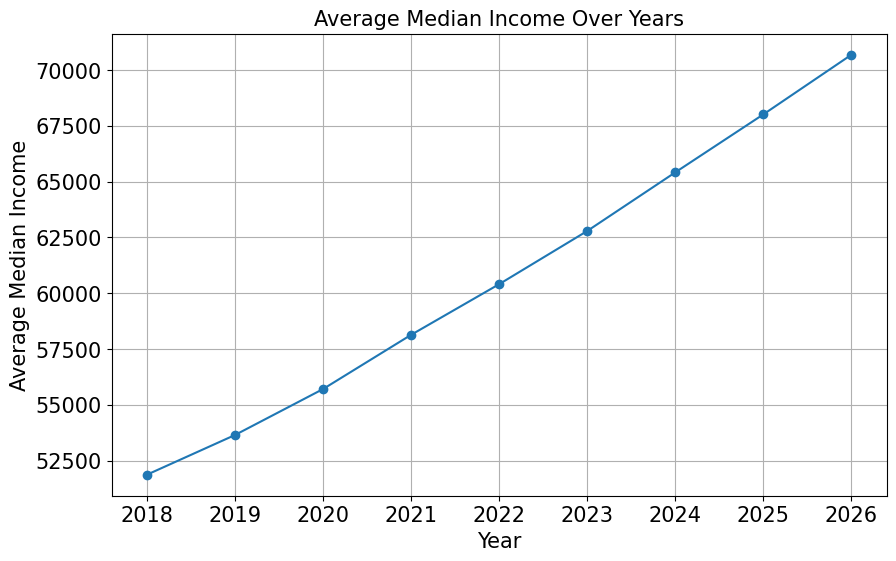

In [13]:
income_2018 = data['median_income_2018'].mean()
income_2019 = data['median_income_2019'].mean()
income_2020 = data['median_income_2020'].mean()
income_2021 = data['median_income_2021'].mean()
income_2022 = data['median_income_2022'].mean()
income_2023 = data['median_income_2023'].mean()
income_2024 = data['median_income_2024'].mean()
income_2025 = data['median_income_2025'].mean()
income_2026 = data['median_income_2026'].mean()

years = ['2018', '2019', '2020', '2021', '2022', '2023','2024','2025','2026']
incomes = [income_2018, income_2019, income_2020, income_2021, income_2022, income_2023, income_2024, income_2025, income_2026]

plt.figure(figsize=(10, 6))
plt.plot(years, incomes, marker='o')
plt.title('Average Median Income Over Years')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.xlabel('Year')
plt.ylabel('Average Median Income')
plt.grid(True)
plt.savefig('../../plots/average_median_income.png')
plt.show()


In [14]:
years = ['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025','2026']
suburbs = data['Label'].unique()

population_long = population.melt(id_vars=['Label'], var_name='Year', value_name='Population')
population_long['Year'] = population_long['Year'].str.extract('(\d{4})')
population_long

incomes_long = data.melt(id_vars=['Label'], value_vars=[f'median_income_{year}' for year in years], var_name='Year', value_name='Income')
incomes_long['Year'] = incomes_long['Year'].str.extract('(\d{4})')

properties_long = properties_even.melt(id_vars=['Label'], var_name='Year', value_name='Median_Price')
properties_long['Year'] = properties_long['Year'].str.extract('(\d{4})')

population_long
incomes_long
properties_long


,Label,Year,Median_Price
0,Albert Park,2016,515.0
1,Middle Park,2016,515.0
2,West St Kilda,2016,515.0
3,Armadale,2016,402.5
4,Carlton North,2016,527.5
...,...,...,...
1715,Traralgon,2023,385.0
1716,Wanagaratta,2023,380.0
1717,Warragul,2023,440.0
1718,Warrnambool,2023,420.0


In [15]:
data_long = pd.merge(population_long, incomes_long, on=['Label', 'Year'])
data_long = pd.merge(data_long, properties_long, on=['Label', 'Year'])

data_long = data_long.sort_values(by=['Label', 'Year'])
data_long

data_long_test = pd.merge(population_long, incomes_long, on=['Label', 'Year'])
data_long_test = data_long_test.sort_values(by=['Label', 'Year'])
data_long_test = data_long_test[~data_long_test['Year'].isin(['2018', '2019', '2020', '2021','2022'])]

In [16]:
# Create lagged features
data_long['Lagged Income'] = data_long.groupby('Label')['Income'].shift(1)
data_long['Lagged Population'] = data_long.groupby('Label')['Population'].shift(1)
data_long['Lagged Median_Price'] = data_long.groupby('Label')['Median_Price'].shift(1)

data_long_test['Lagged Income'] = data_long_test.groupby('Label')['Income'].shift(1)
data_long_test['Lagged Population'] = data_long_test.groupby('Label')['Population'].shift(1)

data_long['Income Growth'] = (data_long['Income'] - data_long['Lagged Income']) / data_long['Lagged Income']
data_long['Population Growth'] = (data_long['Population'] - data_long['Lagged Population']) / data_long['Lagged Population']
data_long['Median_Price Growth'] = (data_long['Median_Price'] - data_long['Lagged Median_Price']) / data_long['Lagged Median_Price']

data_long_test['Income Growth'] = (data_long_test['Income'] - data_long_test['Lagged Income']) / data_long_test['Lagged Income']
data_long_test['Population Growth'] = (data_long_test['Population'] - data_long_test['Lagged Population']) / data_long_test['Lagged Population']

# Imputation for missing values

# Calculate average lagged feature change for each label
data_long['Avg Income Change'] = data_long.groupby('Label')['Lagged Income'].transform(lambda x: x.diff().mean())
data_long['Avg Population Change'] = data_long.groupby('Label')['Lagged Population'].transform(lambda x: x.diff().mean())
data_long['Avg Median_Price Change'] = data_long.groupby('Label')['Lagged Median_Price'].transform(lambda x: x.diff().mean())
data_long['Avg Income Growth'] = data_long.groupby('Label')['Income Growth'].transform(lambda x: x.mean())
data_long['Avg Population Growth'] = data_long.groupby('Label')['Population Growth'].transform(lambda x: x.mean())
data_long['Avg Median_Price Growth'] = data_long.groupby('Label')['Median_Price Growth'].transform(lambda x: x.mean())

data_long_test['Avg Income Change'] = data_long_test.groupby('Label')['Lagged Income'].transform(lambda x: x.diff().mean())
data_long_test['Avg Population Change'] = data_long_test.groupby('Label')['Lagged Population'].transform(lambda x: x.diff().mean())
data_long_test['Avg Income Growth'] = data_long_test.groupby('Label')['Income Growth'].transform(lambda x: x.mean())
data_long_test['Avg Population Growth'] = data_long_test.groupby('Label')['Population Growth'].transform(lambda x: x.mean())

# Fill missing values with average change
data_long['Income Growth'] = data_long['Income Growth'].fillna(data_long['Avg Income Growth'])
data_long['Population Growth'] = data_long['Population Growth'].fillna(data_long['Avg Population Growth'])
data_long['Median_Price Growth'] = data_long['Median_Price Growth'].fillna(data_long['Avg Median_Price Growth'])

data_long['Lagged Income'] = data_long['Lagged Income'].fillna(data_long['Income'] - data_long['Avg Income Change'])
data_long['Lagged Population'] = data_long['Lagged Population'].fillna(data_long['Population'] - data_long['Avg Population Change'])
data_long['Lagged Median_Price'] = data_long['Lagged Median_Price'].fillna(data_long['Median_Price'] - data_long['Avg Median_Price Change'])

data_long_test = data_long_test[data_long_test['Year'] != '2023']

# Merge data_long and data_long_test
data_long_all = pd.concat([data_long, data_long_test])
data_long_all = data_long_all.sort_values(by=['Label', 'Year'])
data_long_all_encoded = pd.get_dummies(data_long_all, columns=['Label', 'Year'])
'''data_long_encoded = pd.get_dummies(data_long, columns=['Label', 'Year'])
data_long_encoded_test = pd.get_dummies(data_long_test, columns=['Label', 'Year'])'''

"data_long_encoded = pd.get_dummies(data_long, columns=['Label', 'Year'])\ndata_long_encoded_test = pd.get_dummies(data_long_test, columns=['Label', 'Year'])"

In [17]:
# Split data_long_encoded into train and test sets
data_long_all_encoded_train = data_long_all_encoded.dropna()
data_long_all_encoded_test = data_long_all_encoded[data_long_all_encoded.isna().any(axis=1)]

In [18]:
data_long_all_encoded_test

,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,...,Label_Yarraville,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026
546,10527.676824,77788.073345,NaN,74636.644356,10008.000000,NaN,0.042224,0.051926,NaN,2895.519978,...,False,False,False,False,False,False,False,True,False,False
637,10914.578045,80427.684311,NaN,77788.073345,10527.676824,NaN,0.033933,0.036751,NaN,2895.519978,...,False,False,False,False,False,False,False,False,True,False
728,11189.069984,83781.391430,NaN,80427.684311,10914.578045,NaN,0.041698,0.025149,NaN,2895.519978,...,False,False,False,False,False,False,False,False,False,True
547,17665.062455,80239.921519,NaN,77000.919533,16861.000000,NaN,0.042064,0.047688,NaN,3027.336527,...,False,False,False,False,False,False,False,True,False,False
638,18280.665009,83055.592588,NaN,80239.921519,17665.062455,NaN,0.035091,0.034849,NaN,3027.336527,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,17519.990001,81302.131284,NaN,78219.736136,17090.461962,NaN,0.039407,0.025133,NaN,3110.810248,...,False,False,False,False,False,False,False,False,True,False
817,17870.295152,84309.315494,NaN,81302.131284,17519.990001,NaN,0.036988,0.019995,NaN,3110.810248,...,False,False,False,False,False,False,False,False,False,True
636,16523.217961,84431.867671,NaN,81342.059481,16020.000000,NaN,0.037985,0.031412,NaN,3176.985675,...,True,False,False,False,False,False,False,True,False,False
727,16987.482063,87696.030832,NaN,84431.867671,16523.217961,NaN,0.038660,0.028098,NaN,3176.985675,...,True,False,False,False,False,False,False,False,True,False


In [19]:
# Lasso Regression Model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = data_long_all_encoded_train.drop(columns=['Median_Price','Lagged Median_Price','Median_Price Growth','Avg Median_Price Growth','Avg Median_Price Change'])
y = data_long_all_encoded_train['Median_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_mse

np.float64(671.5486365123393)

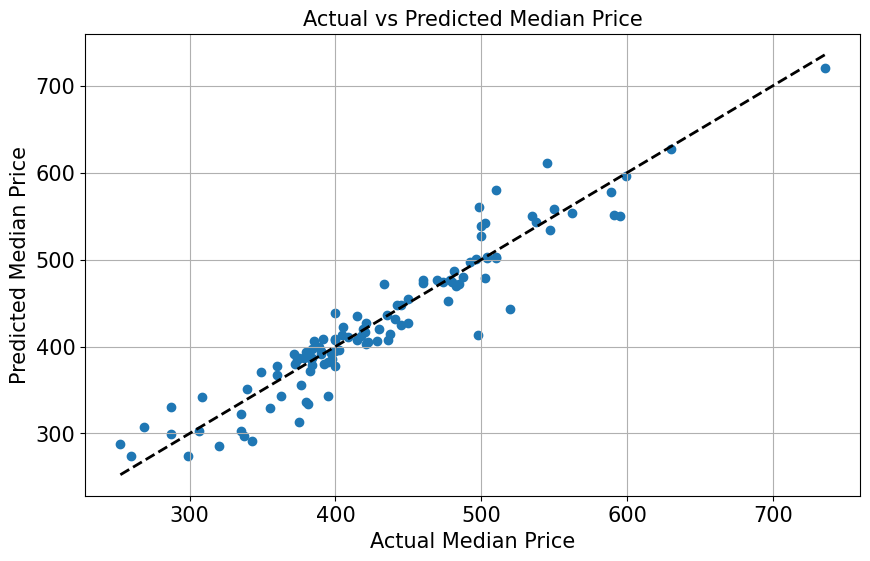

In [20]:
# Graph the predicted vs actual median prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Median Price')
plt.ylabel('Predicted Median Price')
plt.title('Actual vs Predicted Median Price')
plt.grid(True)
# Plot the y=x line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [21]:
data_long_all_encoded_train

,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,...,Label_Yarraville,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026
0,9527.0,59923.000000,477.50,57098.801034,9530.5,480.9375,0.044974,0.010387,0.020067,2824.198966,...,False,True,False,False,False,False,False,False,False,False
91,9594.0,61918.000000,495.00,59923.000000,9527.0,477.5000,0.033293,0.007033,0.036649,2824.198966,...,False,False,True,False,False,False,False,False,False,False
182,9672.0,66091.000000,482.50,61918.000000,9594.0,495.0000,0.067396,0.008130,-0.025253,2824.198966,...,False,False,False,True,False,False,False,False,False,False
273,9258.0,69104.795585,435.00,66091.000000,9672.0,482.5000,0.045601,-0.042804,-0.098446,2824.198966,...,False,False,False,False,True,False,False,False,False,False
364,9513.0,71219.795864,463.75,69104.795585,9258.0,435.0000,0.030606,0.027544,0.066092,2824.198966,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,16092.0,69379.000000,485.00,66465.000000,15991.0,463.7500,0.043843,0.006316,0.045822,2920.494279,...,True,False,True,False,False,False,False,False,False,False
272,16068.0,72428.000000,491.25,69379.000000,16092.0,485.0000,0.043947,-0.001491,0.012887,2920.494279,...,True,False,False,True,False,False,False,False,False,False
363,15651.0,75150.947880,477.50,72428.000000,16068.0,491.2500,0.037595,-0.025952,-0.027990,2920.494279,...,True,False,False,False,True,False,False,False,False,False
454,15661.0,78146.977115,475.00,75150.947880,15651.0,477.5000,0.039867,0.000639,-0.005236,2920.494279,...,True,False,False,False,False,True,False,False,False,False


In [22]:
# Predicting Median Prices for 2024,2025,2026
X_test = data_long_all_encoded_test.drop(columns=['Median_Price','Lagged Median_Price','Median_Price Growth','Avg Median_Price Growth','Avg Median_Price Change'])
X_test_scaled = scaler.transform(X_test)
y_test = lasso.predict(X_test_scaled)

# Add the predicted median prices to the data_long_all_encoded_test dataframe
data_long_all_encoded_test['Median_Price'] = y_test

/tmp/ipykernel_8948/332368323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_encoded_test['Median_Price'] = y_test


In [23]:
# Decode the 'Year' columns back to their original form
data_long_all_encoded_test['Year'] = data_long_all_encoded_test.filter(like='Year_').idxmax(axis=1).str.replace('Year_', '')
data_long_all_encoded_test['Label'] = data_long_all_encoded_test.filter(like='Label_').idxmax(axis=1).str.replace('Label_', '')
# Drop the encoded columns
encoded_columns = data_long_all_encoded_test.filter(like='Label_').columns.tolist() + data_long_all_encoded_test.filter(like='Year_').columns.tolist()
data_long_all_encoded_test.drop(columns=encoded_columns, inplace=True)
data_long_all_encoded_test



/tmp/ipykernel_8948/2152552872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_encoded_test['Year'] = data_long_all_encoded_test.filter(like='Year_').idxmax(axis=1).str.replace('Year_', '')
/tmp/ipykernel_8948/2152552872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_encoded_test['Label'] = data_long_all_encoded_test.filter(like='Label_').idxmax(axis=1).str.replace('Label_', '')
/tmp/ipykernel_8948/2152552872.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,Avg Population Change,Avg Median_Price Change,Avg Income Growth,Avg Population Growth,Avg Median_Price Growth,Year,Label
546,10527.676824,77788.073345,473.299972,74636.644356,10008.000000,NaN,0.042224,0.051926,NaN,2895.519978,453.289022,NaN,0.039285,0.037942,NaN,2024,Abbotsford
637,10914.578045,80427.684311,471.875016,77788.073345,10527.676824,NaN,0.033933,0.036751,NaN,2895.519978,453.289022,NaN,0.039285,0.037942,NaN,2025,Abbotsford
728,11189.069984,83781.391430,471.932113,80427.684311,10914.578045,NaN,0.041698,0.025149,NaN,2895.519978,453.289022,NaN,0.039285,0.037942,NaN,2026,Abbotsford
547,17665.062455,80239.921519,611.166812,77000.919533,16861.000000,NaN,0.042064,0.047688,NaN,3027.336527,709.832504,NaN,0.038866,0.035283,NaN,2024,Albert Park
638,18280.665009,83055.592588,609.964489,80239.921519,17665.062455,NaN,0.035091,0.034849,NaN,3027.336527,709.832504,NaN,0.038866,0.035283,NaN,2025,Albert Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,17519.990001,81302.131284,558.379812,78219.736136,17090.461962,NaN,0.039407,0.025133,NaN,3110.810248,466.995001,NaN,0.039402,0.025181,NaN,2025,Williamstown
817,17870.295152,84309.315494,557.928878,81302.131284,17519.990001,NaN,0.036988,0.019995,NaN,3110.810248,466.995001,NaN,0.039402,0.025181,NaN,2026,Williamstown
636,16523.217961,84431.867671,489.091678,81342.059481,16020.000000,NaN,0.037985,0.031412,NaN,3176.985675,483.741032,NaN,0.038678,0.027331,NaN,2024,Yarraville
727,16987.482063,87696.030832,488.982533,84431.867671,16523.217961,NaN,0.038660,0.028098,NaN,3176.985675,483.741032,NaN,0.038678,0.027331,NaN,2025,Yarraville


In [24]:
# Move Label and Year columns to the front
cols = data_long_all_encoded_test.columns.tolist()
cols = cols[-2:] + cols[:-2]
data_long_all_encoded_test = data_long_all_encoded_test[cols]
data_long_preds = data_long_all_encoded_test

# Keep only columns that are shared between data_long and data_long_preds
shared_columns = data_long.columns.intersection(data_long_preds.columns)
data_long_preds = data_long_preds[shared_columns]

# Add data_long_preds to data_long by row
data_long_final = pd.concat([data_long, data_long_preds], ignore_index=True)



'''
# Top 10 suburbs with the highest median prices in 2024, 2025, and 2026
data_long_all_encoded_test_2024 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2024']
data_long_all_encoded_test_2025 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2025']
data_long_all_encoded_test_2026 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2026']




top_10_2024 = data_long_all_encoded_test_2024.sort_values(by='Median_Price', ascending=False).head(10)
top_10_2025 = data_long_all_encoded_test_2025.sort_values(by='Median_Price', ascending=False).head(10)
top_10_2026 = data_long_all_encoded_test_2026.sort_values(by='Median_Price', ascending=False).head(10)

# Keep only Year, Label, Population, Income, Median_Price columns
columns_to_keep = ['Year', 'Label', 'Population', 'Income', 'Median_Price']
top_10_2024 = top_10_2024[columns_to_keep]
top_10_2025 = top_10_2025[columns_to_keep]
top_10_2026 = top_10_2026[columns_to_keep]

top_10_2024
top_10_2025
top_10_2026'''


"\n# Top 10 suburbs with the highest median prices in 2024, 2025, and 2026\ndata_long_all_encoded_test_2024 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2024']\ndata_long_all_encoded_test_2025 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2025']\ndata_long_all_encoded_test_2026 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2026']\n\n\n\n\ntop_10_2024 = data_long_all_encoded_test_2024.sort_values(by='Median_Price', ascending=False).head(10)\ntop_10_2025 = data_long_all_encoded_test_2025.sort_values(by='Median_Price', ascending=False).head(10)\ntop_10_2026 = data_long_all_encoded_test_2026.sort_values(by='Median_Price', ascending=False).head(10)\n\n# Keep only Year, Label, Population, Income, Median_Price columns\ncolumns_to_keep = ['Year', 'Label', 'Population', 'Income', 'Median_Price']\ntop_10_2024 = top_10_2024[columns_to_keep]\ntop_10_2025 = top_10_2025[columns_to_keep]\ntop_10_2026 = top_10_2026[columns_to_keep]\n\n

In [25]:
data_long_final['Lagged Income'] = data_long_final.groupby('Label')['Income'].shift(1)
data_long_final['Lagged Population'] = data_long_final.groupby('Label')['Population'].shift(1)
data_long_final['Lagged Median_Price'] = data_long_final.groupby('Label')['Median_Price'].shift(1)

data_long_final['Median_Price Growth'] = (data_long_final['Median_Price'] - data_long_final['Lagged Median_Price']) / data_long_final['Lagged Median_Price']

# Calculate the change in Median Price from 2024-2026 in each suburb
data_long_final['Median_Price Change'] = data_long_final.groupby('Label')['Median_Price'].diff()

# Filter the data for the years 2024-2026
data_2024_2026 = data_long_final[data_long_final['Year'].isin(['2024', '2025', '2026'])]

# Calculate the change in Median Price from 2024-2026 for each suburb
median_price_change = data_2024_2026.groupby('Label')['Median_Price Change'].sum().reset_index()
median_price_change.rename(columns={'Median_Price Change': 'Total Median_Price Change 2024-2026'}, inplace=True)
median_price_change

'''
# Top 10 suburbs with the highest median price growth in 2024, 2025, and 2026
data_long_final_2024 = data_long_final[data_long_final['Year'] == '2024']
data_long_final_2025 = data_long_final[data_long_final['Year'] == '2025']
data_long_final_2026 = data_long_final[data_long_final['Year'] == '2026']

top_10_growth_2024 = data_long_final_2024.sort_values(by='Median_Price Growth', ascending=False).head(10)
top_10_growth_2025 = data_long_final_2025.sort_values(by='Median_Price Growth', ascending=False).head(10)
top_10_growth_2026 = data_long_final_2026.sort_values(by='Median_Price Growth', ascending=False).head(10)

# Drop irrelevant columns
columns_to_keep = ['Year', 'Label', 'Population', 'Income', 'Median_Price', 'Median_Price Growth']
top_10_growth_2024 = top_10_growth_2024[columns_to_keep]
top_10_growth_2025 = top_10_growth_2025[columns_to_keep]
top_10_growth_2026 = top_10_growth_2026[columns_to_keep]'''



"\n# Top 10 suburbs with the highest median price growth in 2024, 2025, and 2026\ndata_long_final_2024 = data_long_final[data_long_final['Year'] == '2024']\ndata_long_final_2025 = data_long_final[data_long_final['Year'] == '2025']\ndata_long_final_2026 = data_long_final[data_long_final['Year'] == '2026']\n\ntop_10_growth_2024 = data_long_final_2024.sort_values(by='Median_Price Growth', ascending=False).head(10)\ntop_10_growth_2025 = data_long_final_2025.sort_values(by='Median_Price Growth', ascending=False).head(10)\ntop_10_growth_2026 = data_long_final_2026.sort_values(by='Median_Price Growth', ascending=False).head(10)\n\n# Drop irrelevant columns\ncolumns_to_keep = ['Year', 'Label', 'Population', 'Income', 'Median_Price', 'Median_Price Growth']\ntop_10_growth_2024 = top_10_growth_2024[columns_to_keep]\ntop_10_growth_2025 = top_10_growth_2025[columns_to_keep]\ntop_10_growth_2026 = top_10_growth_2026[columns_to_keep]"

In [26]:
# Top 10 suburbs with the highest median price growth from 2024-2026
top_10_growth_2024_2026 = median_price_change.sort_values(by='Total Median_Price Change 2024-2026', ascending=False).head(10)
top_10_growth_2024_2026

# Bottom 10 suburbs with the lowest median price growth from 2024-2026
bottom_10_growth_2024_2026 = median_price_change.sort_values(by='Total Median_Price Change 2024-2026', ascending=True).head(10)


top_10_suburbs_data = data_long_final[data_long_final['Label'].isin(top_10_growth_2024_2026['Label'])]
top_10_suburbs_data = top_10_suburbs_data[['Year', 'Label', 'Population', 'Income', 'Median_Price', 'Median_Price Growth']]
top_10_suburbs_data[top_10_suburbs_data['Year'].isin(['2024', '2026'])]


,Year,Label,Population,Income,Median_Price,Median_Price Growth
549,2024,Albert Park,17665.062455,80239.921519,611.166812,0.121407
551,2026,Albert Park,18706.847174,86331.495226,609.747383,-0.000356
558,2024,Armadale,109278.935733,68375.766886,502.593633,0.025701
560,2026,Armadale,115653.092418,73885.745371,501.625013,-0.001198
600,2024,Broadmeadows,14946.306719,45330.054750,421.992661,0.068336
602,2026,Broadmeadows,15878.383364,48821.978427,419.736907,-0.001049
612,2024,Camberwell,22639.826958,73535.385040,523.054750,0.046109
614,2026,Camberwell,23916.755274,79254.771249,521.720907,-0.001433
636,2024,Dandenong North,23542.350309,56011.629532,410.675134,0.026688
638,2026,Dandenong North,24684.586761,60592.676342,409.708247,-0.001976


In [27]:
data_long_final = data_long_final.sort_values(by=['Label', 'Year'])
data_long_final

,Label,Year,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,Avg Population Change,Avg Median_Price Change,Avg Income Growth,Avg Population Growth,Avg Median_Price Growth,Median_Price Change
0,Abbotsford,2018,9527.000000,59923.000000,477.500000,NaN,NaN,NaN,0.044974,0.010387,NaN,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,NaN
1,Abbotsford,2019,9594.000000,61918.000000,495.000000,59923.000000,9527.000000,477.500000,0.033293,0.007033,0.036649,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,17.500000
2,Abbotsford,2020,9672.000000,66091.000000,482.500000,61918.000000,9594.000000,495.000000,0.067396,0.008130,-0.025253,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,-12.500000
3,Abbotsford,2021,9258.000000,69104.795585,435.000000,66091.000000,9672.000000,482.500000,0.045601,-0.042804,-0.098446,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,-47.500000
4,Abbotsford,2022,9513.000000,71219.795864,463.750000,69104.795585,9258.000000,435.000000,0.030606,0.027544,0.066092,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,28.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Yarraville,2022,15661.000000,78146.977115,475.000000,75150.947880,15651.000000,477.500000,0.039867,0.000639,-0.005236,2920.494279,-82.500000,2.8125,0.041227,0.000487,0.015623,-2.500000
545,Yarraville,2023,16020.000000,81342.059481,500.000000,78146.977115,15661.000000,475.000000,0.040886,0.022923,0.052632,2920.494279,-82.500000,2.8125,0.041227,0.000487,0.015623,25.000000
816,Yarraville,2024,16523.217961,84431.867671,489.091678,81342.059481,16020.000000,500.000000,0.037985,0.031412,-0.021817,3176.985675,483.741032,NaN,0.038678,0.027331,NaN,-10.908322
817,Yarraville,2025,16987.482063,87696.030832,488.982533,84431.867671,16523.217961,489.091678,0.038660,0.028098,-0.000223,3176.985675,483.741032,NaN,0.038678,0.027331,NaN,-0.109145


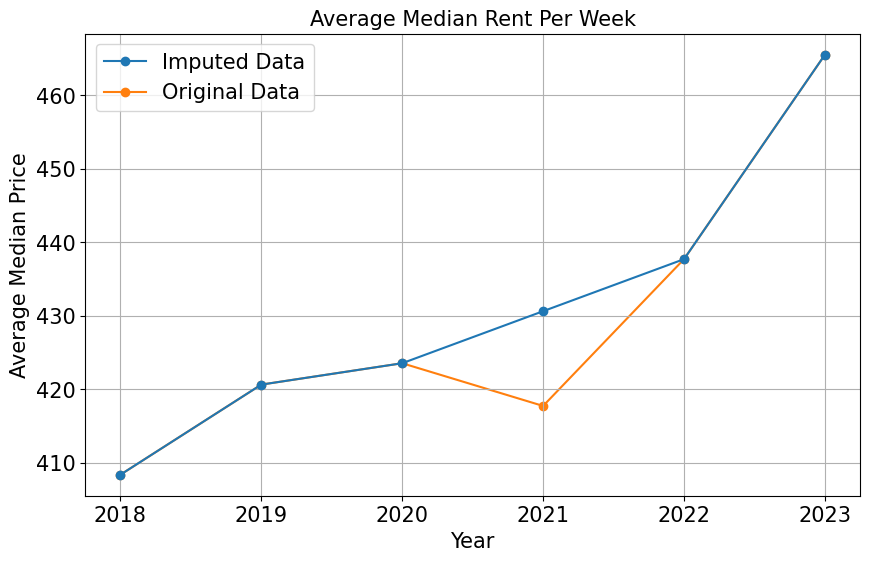

In [28]:
# Trying to average 2021 price data

data_long_all_branch = data_long_all.copy()
data_long_all_branch.loc[data_long_all['Year'] == '2021', 'Median_Price'] = (data_long_all.loc[data_long_all['Year'] == '2020', 'Median_Price'].values + data_long_all.loc[data_long_all['Year'] == '2022', 'Median_Price'].values) / 2


# Calculate the average median price per year
average_median_price_per_year = data_long_all_branch.groupby('Year')['Median_Price'].mean().reset_index()

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
means = [mean_2016, mean_2017, mean_2018, mean_2019, mean_2020, mean_2021, mean_2022, mean_2023]

# Plot the average median price per year
plt.figure(figsize=(10, 6))
plt.plot(average_median_price_per_year['Year'], average_median_price_per_year['Median_Price'], marker='o',zorder=2)
plt.plot(years[2:], means[2:], marker='o',zorder=1)
plt.legend(['Imputed Data', 'Original Data'])
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.title('Average Median Rent Per Week')
plt.xlabel('Year')
plt.ylabel('Average Median Price')
plt.grid(True)
plt.savefig('../../plots/average_median_prices.png')
plt.show()

In [29]:
data_long_all_branch_encoded = pd.get_dummies(data_long_all_branch, columns=['Label'])
data_long_all_branch_train = data_long_all_branch.dropna()
data_long_all_branch_encoded_train = data_long_all_branch_encoded.dropna()
data_long_all_branch_encoded_test = data_long_all_branch_encoded[data_long_all_branch_encoded.isna().any(axis=1)]

In [30]:
# Lasso Regression Model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler

X = data_long_all_branch_encoded_train.drop(columns=['Median_Price','Lagged Median_Price','Median_Price Growth','Avg Median_Price Growth','Avg Median_Price Change'])
y = data_long_all_branch_encoded_train['Median_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
lasso_mse = root_mean_squared_error(y_test, y_pred)
lasso_mse

np.float64(25.098871383714734)

In [31]:
data_long_all_branch_train

,Label,Year,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,Avg Population Change,Avg Median_Price Change,Avg Income Growth,Avg Population Growth,Avg Median_Price Growth
0,Abbotsford,2018,9527.0,59923.000000,477.500,57098.801034,9530.5,480.9375,0.044974,0.010387,0.020067,2824.198966,-3.5,-3.4375,0.044974,0.010387,0.020067
91,Abbotsford,2019,9594.0,61918.000000,495.000,59923.000000,9527.0,477.5000,0.033293,0.007033,0.036649,2824.198966,-3.5,-3.4375,0.044974,0.010387,0.020067
182,Abbotsford,2020,9672.0,66091.000000,482.500,61918.000000,9594.0,495.0000,0.067396,0.008130,-0.025253,2824.198966,-3.5,-3.4375,0.044974,0.010387,0.020067
273,Abbotsford,2021,9258.0,69104.795585,473.125,66091.000000,9672.0,482.5000,0.045601,-0.042804,-0.098446,2824.198966,-3.5,-3.4375,0.044974,0.010387,0.020067
364,Abbotsford,2022,9513.0,71219.795864,463.750,69104.795585,9258.0,435.0000,0.030606,0.027544,0.066092,2824.198966,-3.5,-3.4375,0.044974,0.010387,0.020067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Yarraville,2019,16092.0,69379.000000,485.000,66465.000000,15991.0,463.7500,0.043843,0.006316,0.045822,2920.494279,-82.5,2.8125,0.041227,0.000487,0.015623
272,Yarraville,2020,16068.0,72428.000000,491.250,69379.000000,16092.0,485.0000,0.043947,-0.001491,0.012887,2920.494279,-82.5,2.8125,0.041227,0.000487,0.015623
363,Yarraville,2021,15651.0,75150.947880,483.125,72428.000000,16068.0,491.2500,0.037595,-0.025952,-0.027990,2920.494279,-82.5,2.8125,0.041227,0.000487,0.015623
454,Yarraville,2022,15661.0,78146.977115,475.000,75150.947880,15651.0,477.5000,0.039867,0.000639,-0.005236,2920.494279,-82.5,2.8125,0.041227,0.000487,0.015623


In [32]:
data_long_all_branch_cat = data_long_all_branch.copy()
data_long_all_branch_cat['Label'] = data_long_all_branch['Label'].astype('category')
data_long_all_branch_cat['Year'] = data_long_all_branch['Year'].astype(int)
data_long_all_branch_cat_train = data_long_all_branch_cat.dropna()
data_long_all_branch_cat_test = data_long_all_branch_cat[data_long_all_branch_cat.isna().any(axis=1)]

/home/cansenyurt/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:29:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


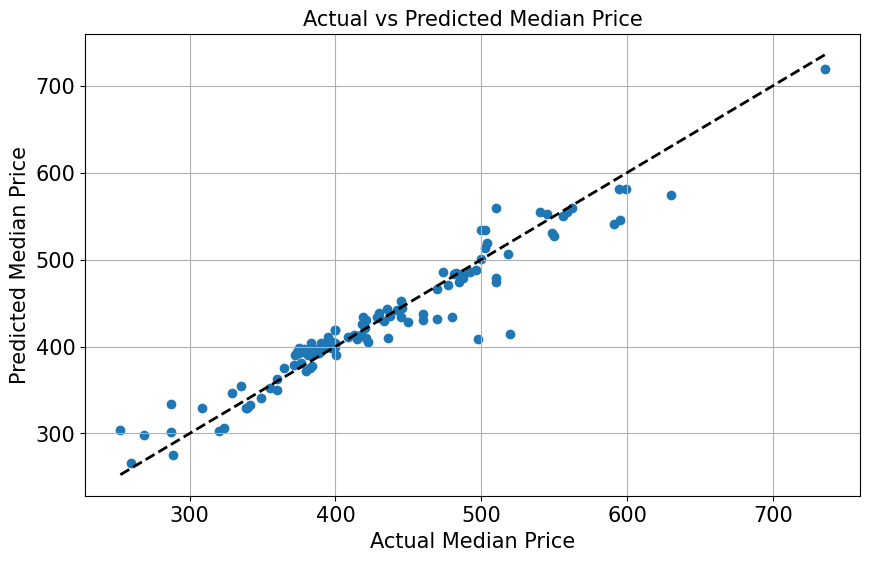

In [33]:
# Gradiant Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

#data_long_all_branch_cat_train['Year'] = data_long_all_branch_cat_train['Year'].astype(int)


X = data_long_all_branch_cat_train.drop(columns=['Median_Price','Lagged Median_Price','Median_Price Growth','Avg Median_Price Growth','Avg Median_Price Change'])
y = data_long_all_branch_cat_train['Median_Price']
y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, root_mean_squared_error

#xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

params = {
    'max_depth': 7,
    'n_estimators': 1000,
    'eta': 0.3,
    'objective': 'reg:squarederror',
    #'tree_method': 'hist',
    #'device' : 'cuda'
}
xgb_model = xgb.train(params, dtrain)

import math 

y_pred = xgb_model.predict(dtest)
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)
xgb_rmse = root_mean_squared_error(y_test, y_pred)
xgb_rmse

# Graph the predicted vs actual median prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Median Price')
plt.ylabel('Predicted Median Price')
plt.title('Actual vs Predicted Median Price')
plt.grid(True)
# Plot the y=x line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [34]:
xgb_rmse

np.float64(22.832644487251816)

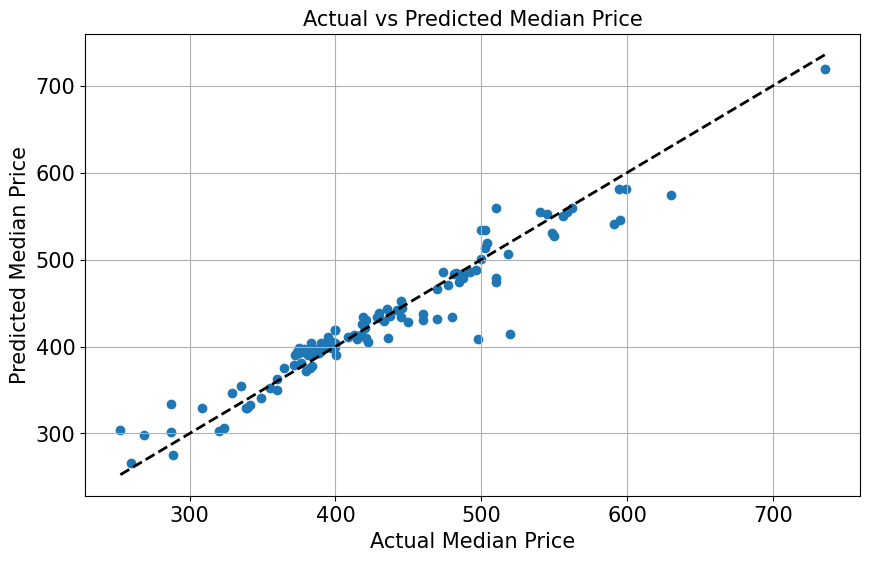

In [35]:
# Graph the predicted vs actual median prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Median Price')
plt.ylabel('Predicted Median Price')
plt.title('Actual vs Predicted Median Price')
plt.grid(True)
# Plot the y=x line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.savefig('../../plots/actual_vs_predicted_median_price.png')
plt.show()

In [36]:
# Tests for Lasso Regression Model
X_test = data_long_all_branch_encoded_test.drop(columns=['Median_Price','Lagged Median_Price','Median_Price Growth','Avg Median_Price Growth','Avg Median_Price Change'])
X_test_scaled = scaler.transform(X_test)
y_test = lasso.predict(X_test_scaled)

# Add the predicted median prices to the data_long_all_encoded_test dataframe
data_long_all_branch_encoded_test['Median_Price'] = y_test

# Decode the 'Year' columns back to their original form
#data_long_all_branch_encoded_test['Year'] = data_long_all_branch_encoded_test.filter(like='Year_').idxmax(axis=1).str.replace('Year_', '')
data_long_all_branch_encoded_test['Label'] = data_long_all_branch_encoded_test.filter(like='Label_').idxmax(axis=1).str.replace('Label_', '')
# Drop the encoded columns
encoded_columns = data_long_all_branch_encoded_test.filter(like='Label_').columns.tolist() + data_long_all_branch_encoded_test.filter(like='Year_').columns.tolist()
data_long_all_branch_encoded_test.drop(columns=encoded_columns, inplace=True)

/tmp/ipykernel_8948/1109221584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_branch_encoded_test['Median_Price'] = y_test
/tmp/ipykernel_8948/1109221584.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_branch_encoded_test['Label'] = data_long_all_branch_encoded_test.filter(like='Label_').idxmax(axis=1).str.replace('Label_', '')
/tmp/ipykernel_8948/1109221584.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [37]:
# Tests for XGBoost model
X_test = data_long_all_branch_cat_test.drop(columns=['Median_Price','Lagged Median_Price','Median_Price Growth','Avg Median_Price Growth','Avg Median_Price Change'])
dtest = xgb.DMatrix(X_test, enable_categorical=True)

y_test = xgb_model.predict(dtest)
y_test = np.exp(y_test)

# Add the predicted median prices to the data_long_all_cat_test dataframe
data_long_all_branch_cat_test['Median_Price'] = y_test
data_long_all_branch_cat_test

# Join the data_long_all_branch_cat_train and data_long_all_branch_cat_test dataframes
data_long_all_branch_cat_final = pd.concat([data_long_all_branch_cat_train, data_long_all_branch_cat_test])
data_long_all_branch_cat_final = data_long_all_branch_cat_final.sort_values(by=['Label', 'Year'])
data_long_all_branch_cat_final

/tmp/ipykernel_8948/1099503177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_branch_cat_test['Median_Price'] = y_test


,Label,Year,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,Avg Population Change,Avg Median_Price Change,Avg Income Growth,Avg Population Growth,Avg Median_Price Growth
0,Abbotsford,2018,9527.000000,59923.000000,477.500000,57098.801034,9530.500000,480.9375,0.044974,0.010387,0.020067,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
91,Abbotsford,2019,9594.000000,61918.000000,495.000000,59923.000000,9527.000000,477.5000,0.033293,0.007033,0.036649,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
182,Abbotsford,2020,9672.000000,66091.000000,482.500000,61918.000000,9594.000000,495.0000,0.067396,0.008130,-0.025253,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
273,Abbotsford,2021,9258.000000,69104.795585,473.125000,66091.000000,9672.000000,482.5000,0.045601,-0.042804,-0.098446,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
364,Abbotsford,2022,9513.000000,71219.795864,463.750000,69104.795585,9258.000000,435.0000,0.030606,0.027544,0.066092,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Yarraville,2022,15661.000000,78146.977115,475.000000,75150.947880,15651.000000,477.5000,0.039867,0.000639,-0.005236,2920.494279,-82.500000,2.8125,0.041227,0.000487,0.015623
545,Yarraville,2023,16020.000000,81342.059481,500.000000,78146.977115,15661.000000,475.0000,0.040886,0.022923,0.052632,2920.494279,-82.500000,2.8125,0.041227,0.000487,0.015623
636,Yarraville,2024,16523.217961,84431.867671,495.966614,81342.059481,16020.000000,NaN,0.037985,0.031412,NaN,3176.985675,483.741032,NaN,0.038678,0.027331,NaN
727,Yarraville,2025,16987.482063,87696.030832,495.966614,84431.867671,16523.217961,NaN,0.038660,0.028098,NaN,3176.985675,483.741032,NaN,0.038678,0.027331,NaN


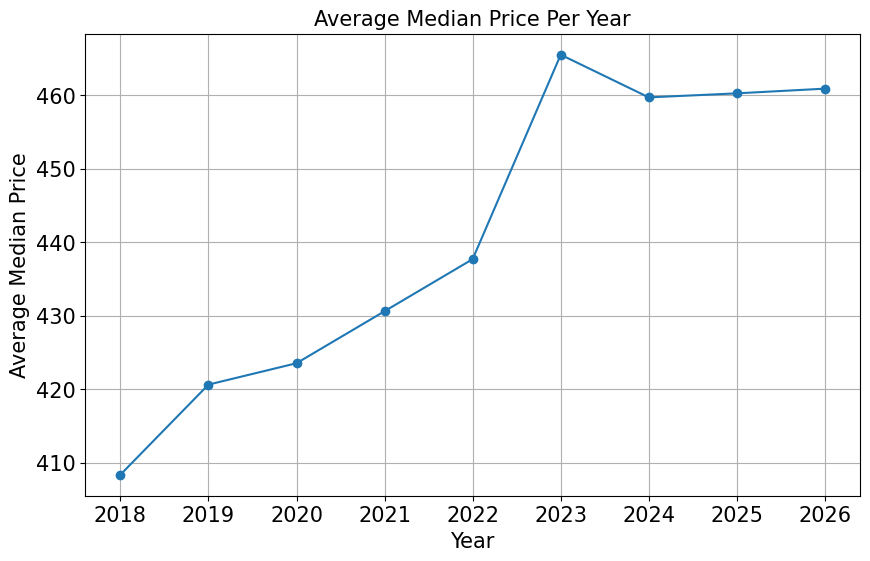

In [38]:
# Calculate avg median price in data_long_final_branch
avg_median_price = data_long_all_branch_cat_final.groupby('Year')['Median_Price'].mean().reset_index()
avg_median_price.rename(columns={'Median_Price': 'Average Median Price'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_median_price['Year'], avg_median_price['Average Median Price'], marker='o')
plt.title('Average Median Price Per Year')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.xlabel('Year')
plt.ylabel('Average Median Price')
plt.grid(True)
#plt.savefig('../../plots/average_median_price_projected.png')
plt.show()


In [39]:
# Move Label and Year columns to the front
cols = data_long_all_branch_encoded_test.columns.tolist()

cols = cols[-2:] + cols[:-2]
data_long_preds = data_long_all_branch_encoded_test[cols]


# Keep only columns that are shared between data_long and data_long_preds
shared_columns = data_long.columns.intersection(data_long_preds.columns)
data_long_preds = data_long_preds[shared_columns]

# Add data_long_preds to data_long by row
data_long_final_branch = pd.concat([data_long_all_branch_train, data_long_preds], ignore_index=True)

In [40]:
# Order by Label and Year
data_long_final_branch = data_long_final_branch.sort_values(by=['Label', 'Year'])
data_long_final_branch

,Label,Year,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,Avg Population Change,Avg Median_Price Change,Avg Income Growth,Avg Population Growth,Avg Median_Price Growth
0,Abbotsford,2018,9527.000000,59923.000000,477.500000,57098.801034,9530.500000,480.9375,0.044974,0.010387,0.020067,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
1,Abbotsford,2019,9594.000000,61918.000000,495.000000,59923.000000,9527.000000,477.5000,0.033293,0.007033,0.036649,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
2,Abbotsford,2020,9672.000000,66091.000000,482.500000,61918.000000,9594.000000,495.0000,0.067396,0.008130,-0.025253,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
3,Abbotsford,2021,9258.000000,69104.795585,473.125000,66091.000000,9672.000000,482.5000,0.045601,-0.042804,-0.098446,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
4,Abbotsford,2022,9513.000000,71219.795864,463.750000,69104.795585,9258.000000,435.0000,0.030606,0.027544,0.066092,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Yarraville,2022,15661.000000,78146.977115,475.000000,75150.947880,15651.000000,477.5000,0.039867,0.000639,-0.005236,2920.494279,-82.500000,2.8125,0.041227,0.000487,0.015623
545,Yarraville,2023,16020.000000,81342.059481,500.000000,78146.977115,15661.000000,475.0000,0.040886,0.022923,0.052632,2920.494279,-82.500000,2.8125,0.041227,0.000487,0.015623
816,Yarraville,2024,16523.217961,84431.867671,524.369885,81342.059481,16020.000000,NaN,0.037985,0.031412,NaN,3176.985675,483.741032,NaN,0.038678,0.027331,NaN
817,Yarraville,2025,16987.482063,87696.030832,533.354473,84431.867671,16523.217961,NaN,0.038660,0.028098,NaN,3176.985675,483.741032,NaN,0.038678,0.027331,NaN


In [41]:
data_long_final_branch['Lagged Income'] = data_long_final_branch.groupby('Label')['Income'].shift(1)
data_long_final_branch['Lagged Population'] = data_long_final_branch.groupby('Label')['Population'].shift(1)
data_long_final_branch['Lagged Median_Price'] = data_long_final_branch.groupby('Label')['Median_Price'].shift(1)

data_long_final_branch['Median_Price Growth'] = (data_long_final_branch['Median_Price'] - data_long_final_branch['Lagged Median_Price']) / data_long_final_branch['Lagged Median_Price']
data_long_final_branch['Median_Price pcnt growth'] = ((data_long_final_branch['Median_Price'] - data_long_final_branch['Lagged Median_Price']) / data_long_final_branch['Lagged Median_Price'])*100

# Calculate the change in Median Price in each suburb
data_long_final_branch['Median_Price Change'] = data_long_final_branch.groupby('Label')['Median_Price'].diff()

# Filter the data for the years 2023-2026
data_2023_2026 = data_long_final_branch[data_long_final_branch['Year'].isin(['2023','2024', '2025', '2026'])]

# Calculate the total change in Median Price from 2023-2026 for each suburb
median_price_change = data_2023_2026.groupby(['Label'])['Median_Price Change'].sum().reset_index()
median_price_change.rename(columns={'Median_Price Change': 'Total Median_Price Change 2023-2026'}, inplace=True)
median_price_change

,Label,Total Median_Price Change 2023-2026
0,Abbotsford,68.511577
1,Albert Park,157.968558
2,Alfredton,71.712629
3,Altona,61.508460
4,Armadale,115.765379
...,...,...
86,Wantirna,82.871273
87,Warragul,43.082061
88,Whittlesea,67.649081
89,Williamstown,89.157735


/tmp/ipykernel_8948/2975592599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_these['26-23'] = graph_these.groupby('Label')['Median_Price'].diff(3)


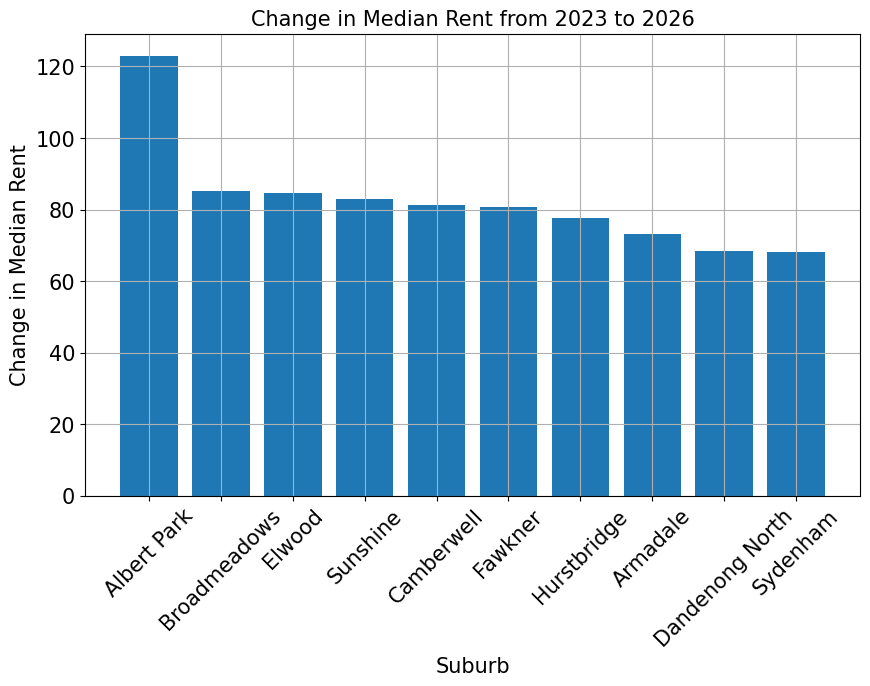

In [42]:
graph_these = data_2023_2026[['Label','Year','Median_Price']]
graph_these['26-23'] = graph_these.groupby('Label')['Median_Price'].diff(3)
top_10_graph = graph_these.sort_values(by='26-23',ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_graph['Label'], top_10_graph['26-23'])
plt.title('Change in Median Rent from 2023 to 2026')
plt.xlabel('Suburb')
plt.ylabel('Change in Median Rent')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('../../plots/change_in_median_rent_2023_2026.png')
plt.show()

In [43]:
# Filter the dataset for the years 2023 and 2026
data_2023 = graph_these[graph_these['Year'] == '2023']
data_2026 = graph_these[graph_these['Year'] == '2026']

# Merge the datasets on the 'Label' column to get 2023 and 2026 data side by side
merged_data = pd.merge(data_2023, data_2026, on='Label', suffixes=('_2023', '_2026'))

# Calculate the percentage growth for each suburb
merged_data['Percentage Growth'] = ((merged_data['Median_Price_2026'] - merged_data['Median_Price_2023']) / merged_data['Median_Price_2023']) * 100

# Display the result
merged_data[['Label', 'Percentage Growth']].sort_values('Percentage Growth', ascending=False).head(10)

,Label,Percentage Growth
1,Albert Park,22.563038
76,Sunshine,22.420130
18,Broadmeadows,21.563606
77,Swan Hill,19.766879
40,Fawkner,19.431414
39,Elwood,18.827259
54,Hurstbridge,17.629904
30,Dandenong North,17.100228
80,Thomastown,16.633983
20,Buninyong,16.538090


In [44]:
# Save table as csv
merged_data[['Label', 'Percentage Growth']].sort_values('Percentage Growth', ascending=False).head(10).to_csv('../../data/curated/suburb_level_results.csv', index=False)

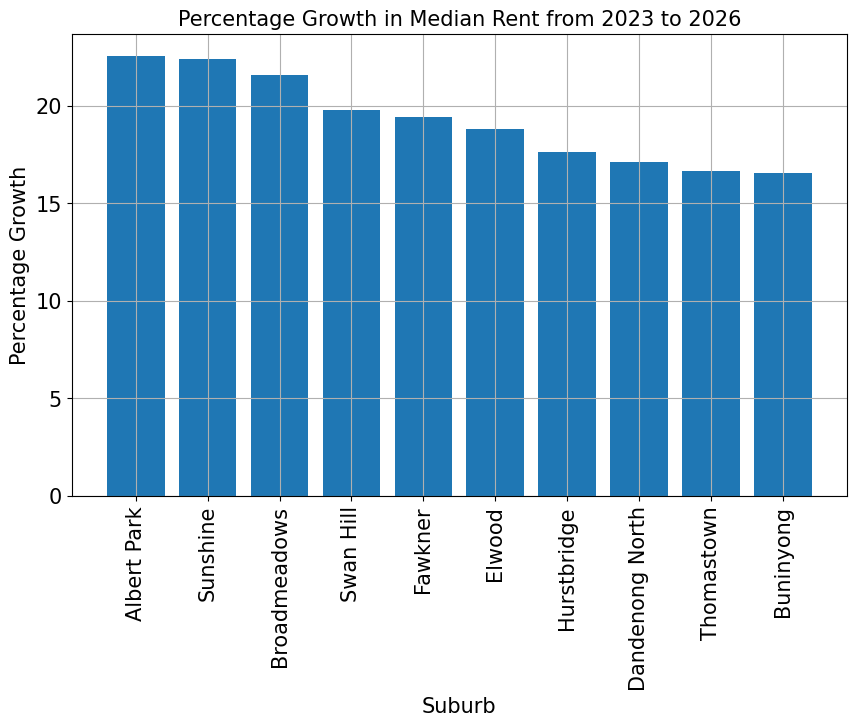

In [45]:
# Graph merged_data
top_10_merged_data = merged_data[['Label', 'Percentage Growth']].sort_values('Percentage Growth', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_merged_data['Label'], top_10_merged_data['Percentage Growth'])
plt.title('Percentage Growth in Median Rent from 2023 to 2026')
plt.xlabel('Suburb')
plt.ylabel('Percentage Growth')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('../../plots/percentage_growth_median_rent_2023_2026.png')

/tmp/ipykernel_8948/2819225061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_these.dropna(inplace=True)


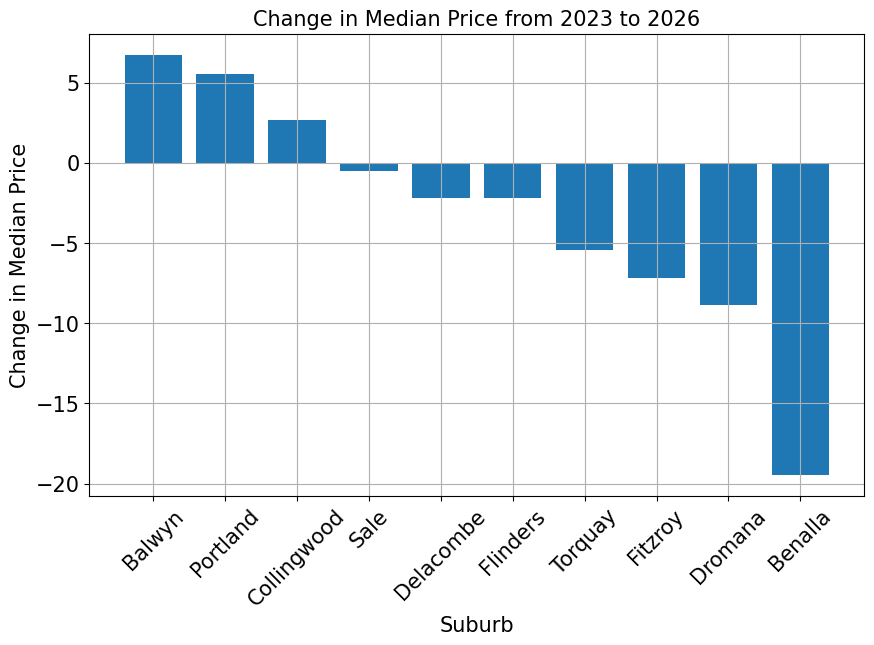

In [46]:
graph_these.dropna(inplace=True)
bottom_10_graph = graph_these.sort_values(by='26-23',ascending=False).tail(10)

plt.figure(figsize=(10, 6))
plt.bar(bottom_10_graph['Label'], bottom_10_graph['26-23'])
plt.title('Change in Median Price from 2023 to 2026')
plt.xlabel('Suburb')
plt.ylabel('Change in Median Price')
plt.xticks(rotation=45)
plt.grid(True)
#plt.savefig('../../plots/change_in_median_rent_2023_2026_bottom.png')
plt.show()

In [47]:
data_2026 = graph_these[graph_these['Year'] == '2026']
data_2026.sort_values(by='Median_Price',ascending=False).head(10)

,Label,Year,Median_Price,26-23
599,Brighton East,2026,805.961287,22.961287
755,Port Melbourne,2026,704.004463,54.004463
578,Beaumaris,2026,675.403794,45.403794
551,Albert Park,2026,667.968558,122.968558
698,Hampton,2026,661.788452,31.788452
674,Fitzroy North,2026,628.380135,28.380135
797,Torquay,2026,614.564701,-5.435299
815,Williamstown,2026,614.157735,64.157735
737,Mulgrave,2026,603.105267,53.105267
644,Docklands,2026,600.346761,50.346761


In [48]:
data_2023_2026 = data_long_final_branch[data_long_final_branch['Year'].isin(['2023', '2024', '2025', '2026'])]
data_2023_2026['Median_Price Change (%)'] = data_2023_2026.groupby('Label').apply(lambda x: (x.loc[x['Year'] == '2026', 'Median_Price'].values[0] - x.loc[x['Year'] == '2023', 'Median_Price'].values[0]) / x.loc[x['Year'] == '2023', 'Median_Price'].values[0] * 100).reset_index(level=0, drop=True)

/tmp/ipykernel_8948/3146048633.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_2023_2026['Median_Price Change (%)'] = data_2023_2026.groupby('Label').apply(lambda x: (x.loc[x['Year'] == '2026', 'Median_Price'].values[0] - x.loc[x['Year'] == '2023', 'Median_Price'].values[0]) / x.loc[x['Year'] == '2023', 'Median_Price'].values[0] * 100).reset_index(level=0, drop=True)
/tmp/ipykernel_8948/3146048633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

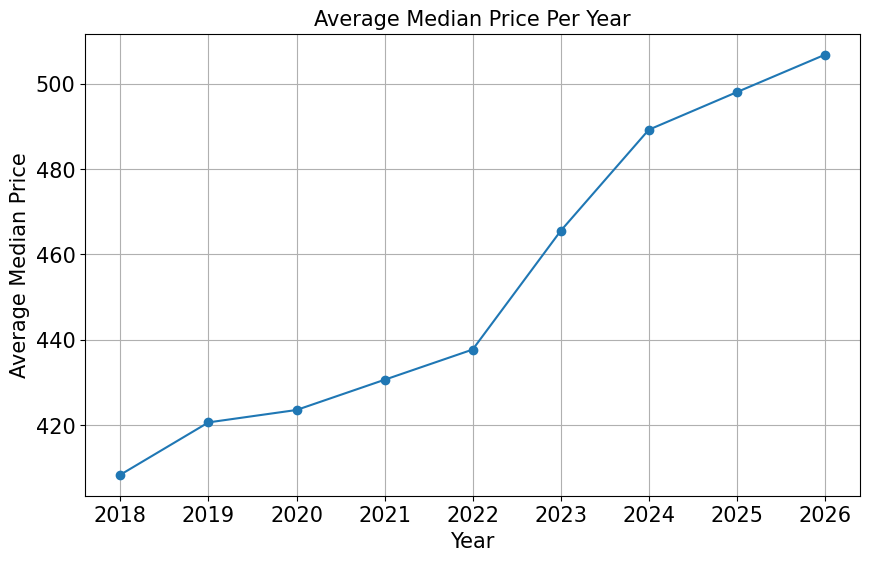

In [49]:
# Calculate avg median price in data_long_final_branch
avg_median_price = data_long_final_branch.groupby('Year')['Median_Price'].mean().reset_index()
avg_median_price.rename(columns={'Median_Price': 'Average Median Price'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_median_price['Year'], avg_median_price['Average Median Price'], marker='o')
plt.title('Average Median Price Per Year')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.xlabel('Year')
plt.ylabel('Average Median Price')
plt.grid(True)
plt.savefig('../../plots/average_median_price_projected.png')
plt.show()


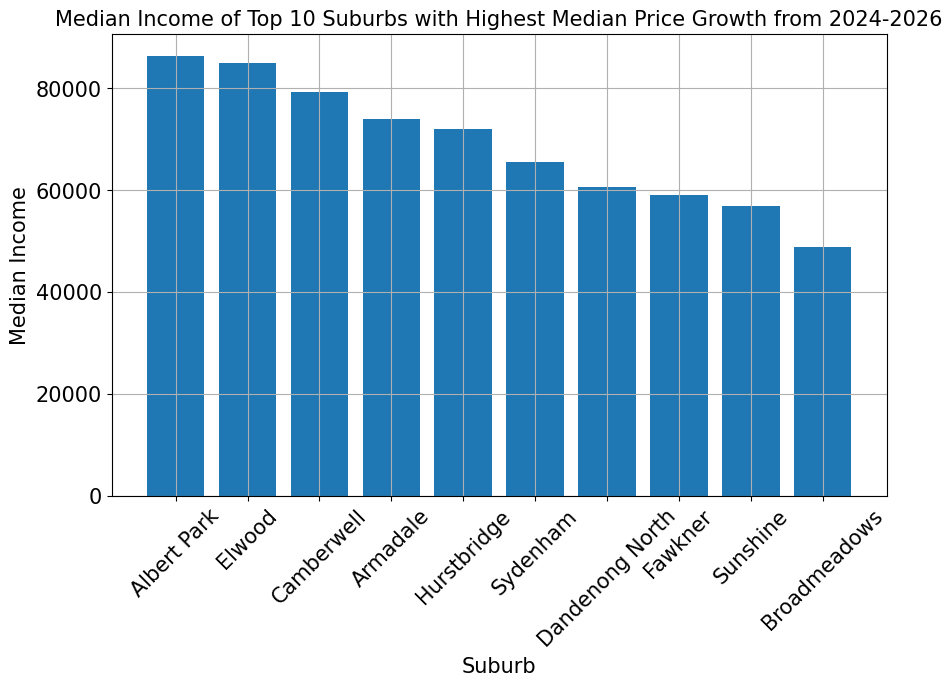

In [50]:
# Plot the median income of the top 10 suburbs with the highest median price growth from 2024-2026
top_10_suburbs_data = top_10_suburbs_data.sort_values(by='Income', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(top_10_suburbs_data['Label'], top_10_suburbs_data['Income'])
plt.title('Median Income of Top 10 Suburbs with Highest Median Price Growth from 2024-2026')
plt.xlabel('Suburb')
plt.ylabel('Median Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

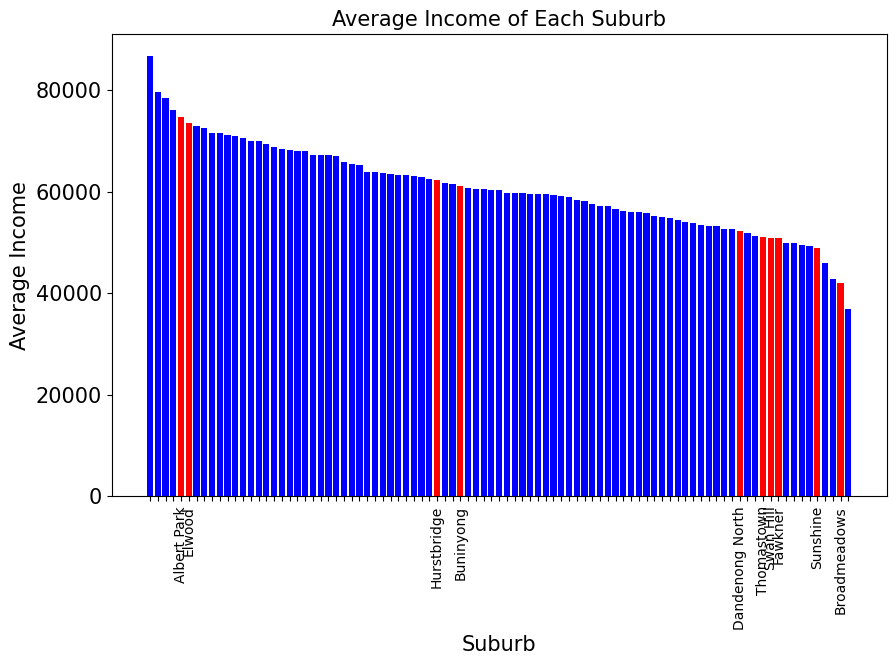

In [74]:
# Plot the average income of each suburb
avg_income_per_suburb = data_long_final_branch.groupby('Label')['Income'].mean().reset_index()
avg_income_per_suburb = avg_income_per_suburb.sort_values(by='Income', ascending=False)
highlighted_suburbs = avg_income_per_suburb[avg_income_per_suburb['Label'].isin(top_10_merged_data['Label'])]
colours = ['red' if bar in highlighted_suburbs['Label'].values else 'blue' for bar in avg_income_per_suburb['Label']]
labels = [suburb if suburb in highlighted_suburbs['Label'].values else '' for suburb in avg_income_per_suburb['Label']]
plt.figure(figsize=(10, 6))
plt.bar(avg_income_per_suburb['Label'], avg_income_per_suburb['Income'],color=colours)
plt.title('Average Income of Each Suburb')
plt.xticks(range(len(avg_income_per_suburb['Label'])), labels)
plt.xlabel('Suburb')
plt.xticks(fontsize=10)
plt.ylabel('Average Income')
plt.xticks(rotation=90)
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.savefig('../../plots/average_income_per_suburb_1.png')
plt.show()